<a href="https://colab.research.google.com/github/Jmazher12/DS4002_Project1/blob/main/SCRIPTS/Project%201%20--%20Predictive%20Model%20and%20Statistical%20Significance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering

In [74]:
# Import CSV of sentiment scores
import pandas as pd
df_new = pd.read_csv('average_sentiment_scores_new.csv')
df_new = df_new.rename(columns={'Unnamed: 0': 'Nominee', 'negative': 'Negative', 'neutral': 'Neutral', 'positive': 'Positive', 'compound': 'Compound'})
df_new.head()

,Nominee,Negative,Neutral,Positive,Compound
0,Shogun,0.066119,0.783145,0.150717,0.545970
1,3 Body,0.084948,0.776804,0.138239,0.371488
2,Fallout,0.062972,0.764109,0.172920,0.677364
3,Mr. & Mrs. Smith,0.072206,0.773490,0.154311,0.473601
4,Slow Horses,0.063275,0.762139,0.174612,0.584364


In [75]:
# Save just the scores
X = df_new[['Negative', 'Neutral', 'Positive', 'Compound']]

X.head()

,Negative,Neutral,Positive,Compound
0,0.066119,0.783145,0.150717,0.545970
1,0.084948,0.776804,0.138239,0.371488
2,0.062972,0.764109,0.172920,0.677364
3,0.072206,0.773490,0.154311,0.473601
4,0.063275,0.762139,0.174612,0.584364


In [76]:
# K Means Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set number of clusters
kmeans = KMeans(n_clusters=3)
# Fit model to data
kmeans.fit(X)
# Get cluster labels
clusters = kmeans.labels_
# Add labels to dataframe
df_new['Cluster'] = clusters
df_new

,Nominee,Negative,Neutral,Positive,Compound,Cluster
0,Shogun,0.066119,0.783145,0.150717,0.545970,1
1,3 Body,0.084948,0.776804,0.138239,0.371488,0
2,Fallout,0.062972,0.764109,0.172920,0.677364,1
3,Mr. & Mrs. Smith,0.072206,0.773490,0.154311,0.473601,2
4,Slow Horses,0.063275,0.762139,0.174612,0.584364,1
5,The Crown,0.069536,0.773465,0.156993,0.492834,2
6,The Gilded Age,0.074688,0.766382,0.158930,0.455320,2
7,The Morning Show,0.067329,0.745900,0.186782,0.515225,2


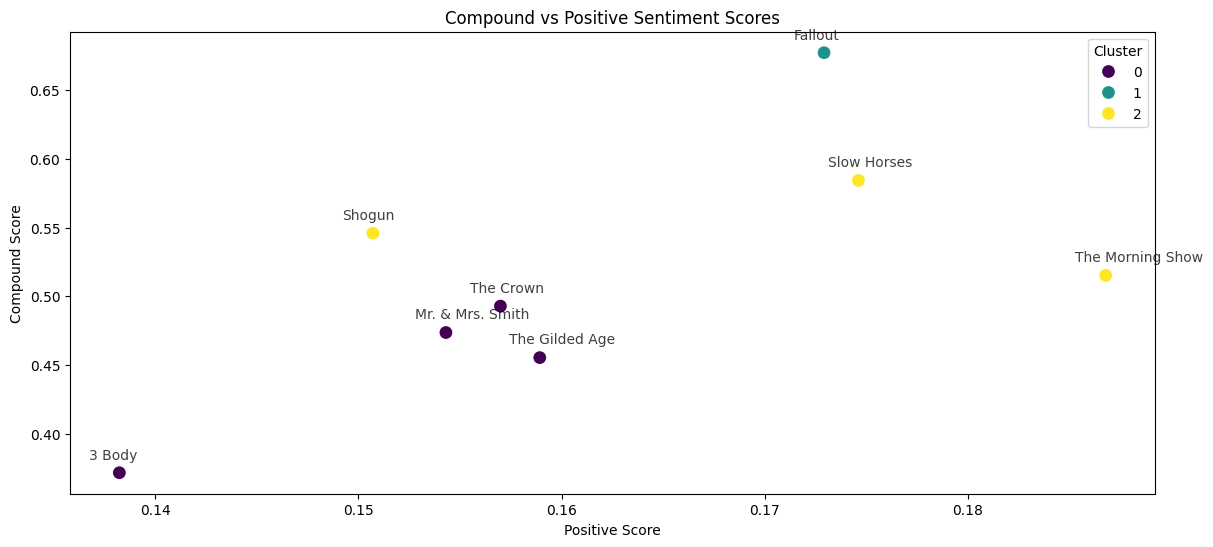

In [70]:
# Visualize Clusters -- Compound vs Positive scores
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Create scatterplot
sns.scatterplot(data = df_new, x = 'Positive', y = 'Compound', hue = 'Cluster', palette = 'viridis', s = 100)

# Add labels and title
plt.xlabel('Positive Score')
plt.ylabel('Compound Score')
plt.title('Compound vs Positive Sentiment Scores')

# Annotate each point
for i, txt in enumerate(df_new['Nominee']):
    plt.annotate(txt, (df_new['Positive'].iloc[i] - 0.0015, df_new['Compound'].iloc[i] + 0.010), fontsize=10, alpha=0.75)

# Display plot
plt.show()

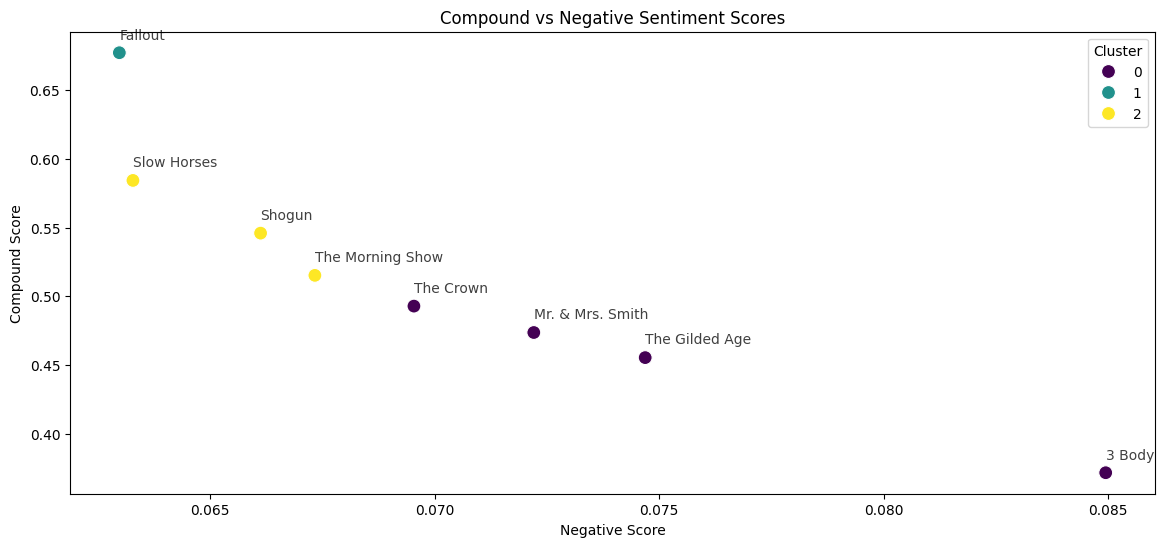

In [71]:
# Visualize Clusters -- Compound vs Negative scores

# Set figure size
plt.figure(figsize=(14, 6))

# Create scatterplot
sns.scatterplot(data = df_new, x = 'Negative', y = 'Compound', hue = 'Cluster', palette = 'viridis', s = 100)

# Add labels and title
plt.xlabel('Negative Score')
plt.ylabel('Compound Score')
plt.title('Compound vs Negative Sentiment Scores')

# Annotate each point
for i, txt in enumerate(df_new['Nominee']):
    plt.annotate(txt, (df_new['Negative'].iloc[i], df_new['Compound'].iloc[i] + 0.01), fontsize=10, alpha=0.75)

# Display plot
plt.show()

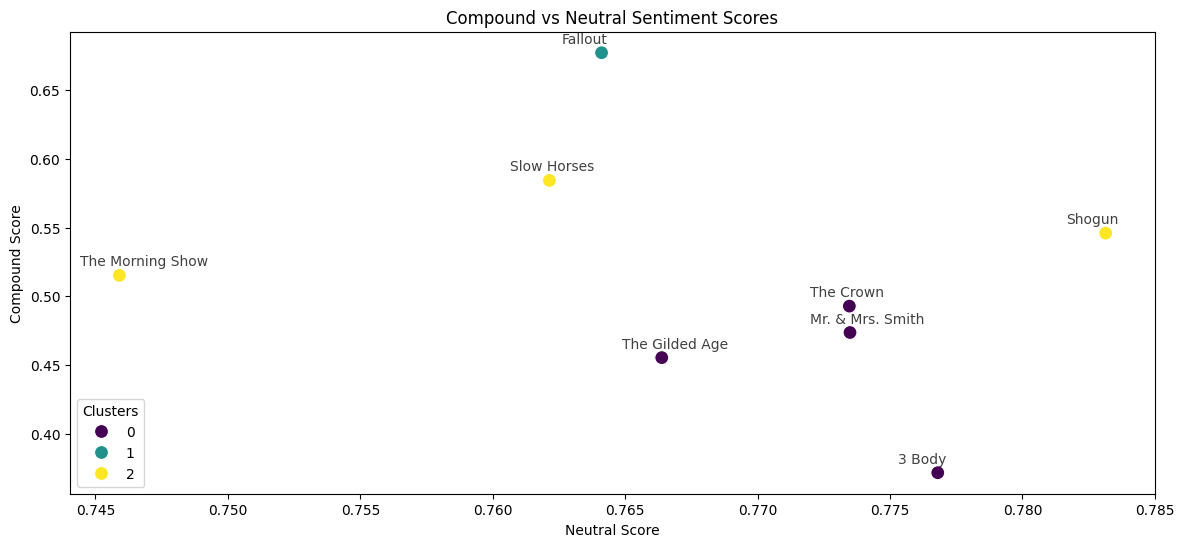

In [72]:
# Visualize Clusters -- Compound vs Neutral scores

# Set figure size
plt.figure(figsize=(14, 6))

# Create scatterplot
sns.scatterplot(data = df_new, x = 'Neutral', y = 'Compound', hue = 'Cluster', palette = 'viridis', s = 100)

# Add labels and title
plt.xlabel('Neutral Score')
plt.ylabel('Compound Score')
plt.title('Compound vs Neutral Sentiment Scores')

# Annotate each point
for i, txt in enumerate(df_new['Nominee']):
    plt.annotate(txt, (df_new['Neutral'].iloc[i] - 0.0015, df_new['Compound'].iloc[i] + 0.007), fontsize=10, alpha=0.75)

# Display plot
plt.legend(title='Clusters', loc='lower left')
plt.show()

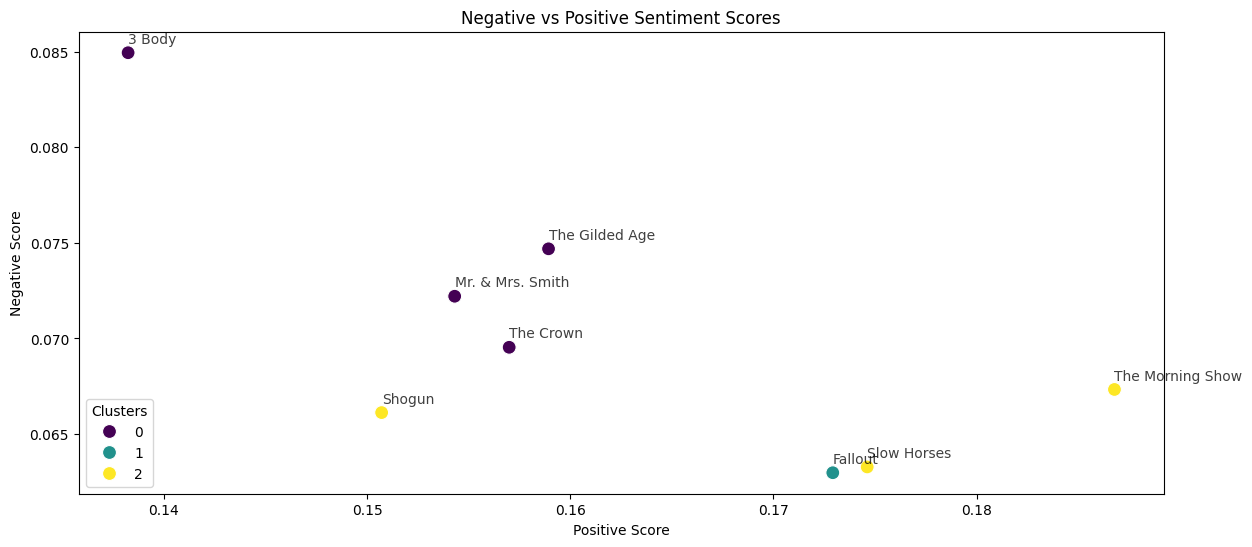

In [73]:
# Visualize Clusters -- Negative vs Positive scores
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Create scatterplot
sns.scatterplot(data = df_new, x = 'Positive', y = 'Negative', hue = 'Cluster', palette = 'viridis', s = 100)

# Add labels and title
plt.xlabel('Positive Score')
plt.ylabel('Negative Score')
plt.title('Negative vs Positive Sentiment Scores')

# Annotate each point
for i, txt in enumerate(df_new['Nominee']):
    plt.annotate(txt, (df_new['Positive'].iloc[i], df_new['Negative'].iloc[i]+0.0005), fontsize=10, alpha=0.75)

# Display plot
plt.legend(title='Clusters', loc='lower left')
plt.show()

Logistic Regression

In [77]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

threshold = df_new['Compound'].max()  # Set a threshold based on the max score
df_new['Synthetic_Winner'] = np.where(df_new['Compound'] >= threshold, 1, 0)

# Split into features and labels
X = df_new[['Compound', 'Positive', 'Negative', 'Neutral']]
y = df_new['Synthetic_Winner']

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities of winning
df_new['Predicted_Probability'] = model.predict_proba(X)[:, 1]

# Display the predictions
print(df_new[['Nominee', 'Compound', 'Predicted_Probability']])

            Nominee  Compound  Predicted_Probability
0            Shogun  0.545970               0.125514
1            3 Body  0.371488               0.122424
2           Fallout  0.677364               0.127903
3  Mr. & Mrs. Smith  0.473601               0.124239
4       Slow Horses  0.584364               0.126238
5         The Crown  0.492834               0.124584
6    The Gilded Age  0.455320               0.123925
7  The Morning Show  0.515225               0.125029


<ipython-input-78-32d5adb32330>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Predicted_Probability', x='Nominee', data = df_new_sorted, palette = 'Blues_d')


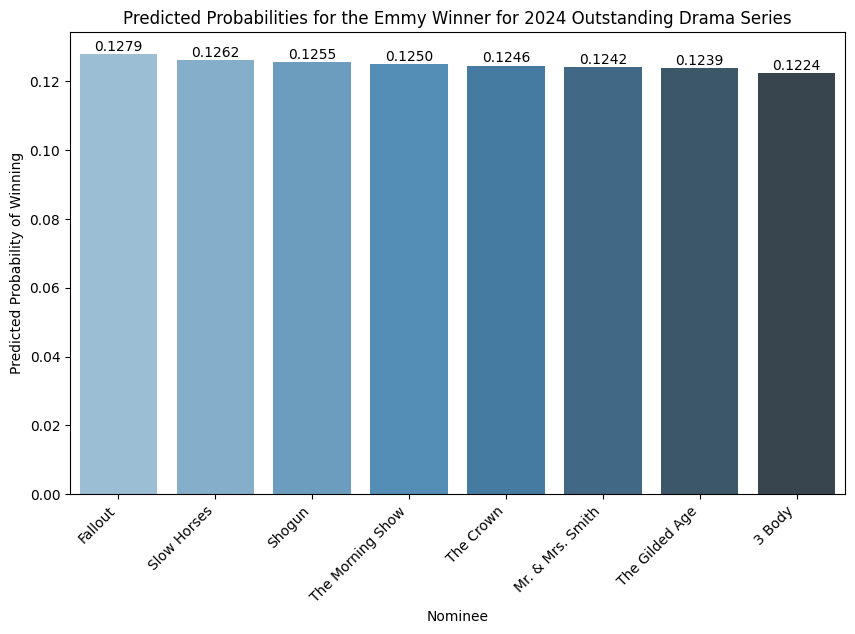

In [78]:
# Barplot of Predicted Probabilities

# Sort the dataframe by predicted probability for better visualization
df_new_sorted = df_new.sort_values(by='Predicted_Probability', ascending=False)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a barplot probability as the y axis
sns.barplot(y='Predicted_Probability', x='Nominee', data = df_new_sorted, palette = 'Blues_d')

# Add labels and title
plt.ylabel('Predicted Probability of Winning')
plt.xlabel('Nominee')
plt.title('Predicted Probabilities for the Emmy Winner for 2024 Outstanding Drama Series')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its predicted probability
for i, v in enumerate(df_new_sorted['Predicted_Probability']):
    plt.text(i, v + 0.0001, f'{v:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()

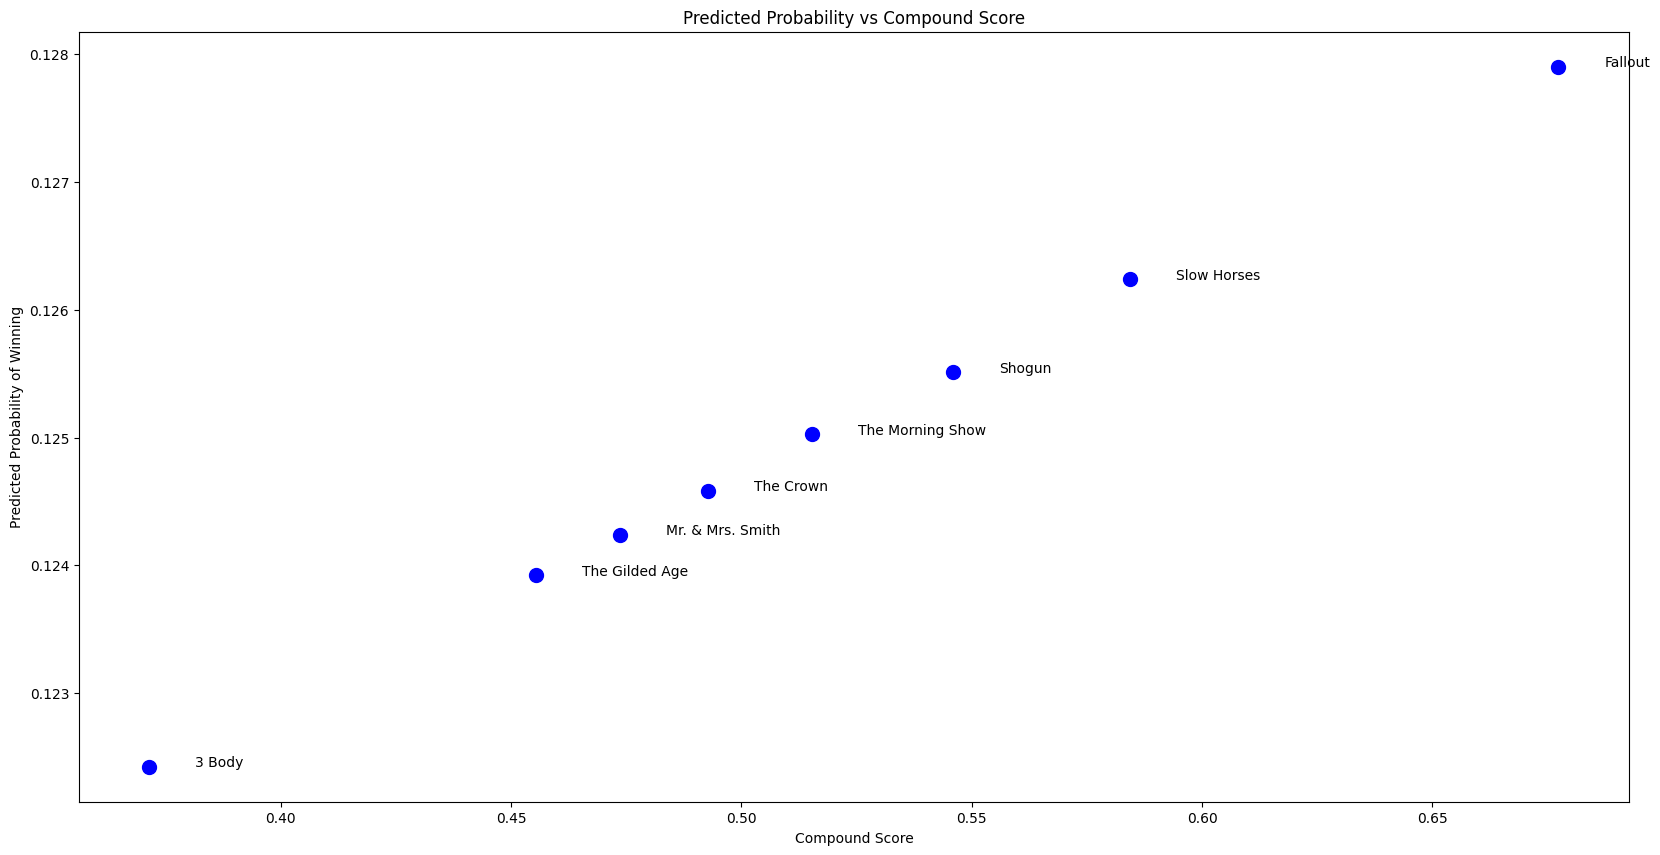

In [79]:
# Scatterplot of predicted probability and compound sentiment score

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Create a scatter plot with compound scores on the x-axis and predicted probabilities on the y-axis
plt.scatter(df_new['Compound'], df_new['Predicted_Probability'], color='blue', s=100)

# Add jitter to space out points
df_new_sorted['jittered_compound'] = df_new_sorted['Compound'] + np.random.normal(0, 0.1, size=len(df_new_sorted))  # Small noise added

# Annotate each point with the corresponding nominee
for i, nominee in enumerate(df_new['Nominee']):
    plt.text(df_new['Compound'][i] + 0.01, df_new['Predicted_Probability'][i], nominee)

# Add labels and title
plt.xlabel('Compound Score')
plt.ylabel('Predicted Probability of Winning')
plt.title('Predicted Probability vs Compound Score')

# Show the plot
plt.show()

Kruskal-Wallis Test

In [80]:
import pandas as pd
from scipy.stats import kruskal


# Separate the performance data for each nominee
nominees = df_new['Nominee'].unique()
grouped_compound = [df_new[df_new['Nominee'] == nominee]['Compound'].values for nominee in nominees]

# Conduct the Kruskal-Wallis H test
kruskal_result = kruskal(*grouped_compound)

# Print the results
print("Kruskal-Wallis result:")
print("H-statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)

# Interpret the results
alpha = 0.05
if kruskal_result.pvalue < alpha:
    print("Reject the null hypothesis: At least one nominee has a significantly different compound score.")
else:
    print("Fail to reject the null hypothesis: No significant difference in compound scores among nominees.")


Kruskal-Wallis result:
H-statistic: 7.0
p-value: 0.42887985755305486
Fail to reject the null hypothesis: No significant difference in compound scores among nominees.
